In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import os

In [2]:
df = pd.read_csv("../data/lille_2022.csv")

In [3]:
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,prix_m2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,0,1.0,Maison,NaN,82.0,5.0,S,NaN,70.0,2681.707317
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,2,2.0,Appartement,NaN,63.0,3.0,NaN,NaN,NaN,2936.507937
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,inf
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,inf
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,inf


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant de document     0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              11354 non-null  int64  
 8   Date mutation               11354 non-null  object 
 9   Nature mutation             11354 non-null  object 
 10  Valeur fonciere             11354 non-null  float64
 11  No voie                     11248 non-null  float64
 12  B/T/Q                       652 non-null    object 
 13  Type de voie                113

In [5]:
df.describe()

/Users/Simplon/Cours/api_rest/projets/IA&Immobilier/.venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/Simplon/Cours/api_rest/projets/IA&Immobilier/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,No voie,...,4eme lot,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture speciale,Surface terrain,prix_m2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11354.000000,1.135400e+04,11248.000000,...,106.000000,50.000000,11354.000000,11354.000000,0.0,11354.000000,11354.000000,0.0,3672.000000,1.135400e+04
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.003963,6.906027e+05,199.709015,...,84.905660,94.180000,0.957812,2.472521,NaN,42.131760,1.323146,NaN,236.449619,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062833,2.354745e+06,1072.930117,...,373.543662,346.065388,0.899357,0.789471,NaN,175.379622,1.666542,NaN,629.515964,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+00,1.000000,...,3.000000,7.000000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,4.000000,1.347709e-04
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.545000e+05,13.000000,...,7.000000,9.000000,0.000000,2.000000,NaN,0.000000,0.000000,NaN,78.000000,3.851514e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.275175e+05,35.000000,...,9.000000,19.000000,1.000000,2.000000,NaN,22.000000,1.000000,NaN,124.000000,1.685750e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.651500e+05,91.000000,...,31.000000,32.000000,1.000000,3.000000,NaN,59.000000,2.000000,NaN,221.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,6.180000e+07,9999.000000,...,3004.000000,2256.000000,17.000000,4.000000,NaN,10945.000000,14.000000,NaN,18147.000000,inf


In [6]:
df = df[df["Nombre pieces principales"] == 4.0]
df.head(20)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,prix_m2
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,0,1.0,Maison,NaN,165.0,4.0,S,NaN,121.0,1848.484848
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,1,2.0,Appartement,NaN,92.0,4.0,NaN,NaN,NaN,3989.130435
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,2,2.0,Appartement,NaN,70.0,4.0,NaN,NaN,NaN,2428.571429
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,2,2.0,Appartement,NaN,105.0,4.0,NaN,NaN,NaN,3383.809524
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,2.0,Appartement,NaN,120.0,4.0,NaN,NaN,NaN,3937.500000
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,0,1.0,Maison,NaN,64.0,4.0,S,NaN,127.0,3545.312500
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/01/2022,Vente,...,1,2.0,Appartement,NaN,71.0,4.0,NaN,NaN,NaN,3238.028169
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,0,1.0,Maison,NaN,70.0,4.0,S,NaN,192.0,2941.285714
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/01/2022,Vente,...,0,1.0,Maison,NaN,62.0,4.0,S,NaN,96.0,2572.580645
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20/01/2022,Vente,...,0,1.0,Maison,NaN,72.0,4.0,S,NaN,135.0,3609.722222


In [7]:
df.shape[0]

789

In [8]:
df["prix_m2"] = df["Valeur fonciere"] / df["Surface reelle bati"]
df.head(20)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,prix_m2
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,0,1.0,Maison,NaN,165.0,4.0,S,NaN,121.0,1848.484848
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,1,2.0,Appartement,NaN,92.0,4.0,NaN,NaN,NaN,3989.130435
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,2,2.0,Appartement,NaN,70.0,4.0,NaN,NaN,NaN,2428.571429
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,2,2.0,Appartement,NaN,105.0,4.0,NaN,NaN,NaN,3383.809524
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,2.0,Appartement,NaN,120.0,4.0,NaN,NaN,NaN,3937.500000
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,0,1.0,Maison,NaN,64.0,4.0,S,NaN,127.0,3545.312500
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/01/2022,Vente,...,1,2.0,Appartement,NaN,71.0,4.0,NaN,NaN,NaN,3238.028169
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,0,1.0,Maison,NaN,70.0,4.0,S,NaN,192.0,2941.285714
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/01/2022,Vente,...,0,1.0,Maison,NaN,62.0,4.0,S,NaN,96.0,2572.580645
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20/01/2022,Vente,...,0,1.0,Maison,NaN,72.0,4.0,S,NaN,135.0,3609.722222


In [9]:
df_appartements = df[df["Type local"] == "Appartement"]
df_appartements.shape[0]

435

In [10]:
df_maisons = df[df["Type local"] == "Maison"]
df_maisons.shape[0]

354

In [11]:
df_appartements = df_appartements[["Surface reelle bati", "Nombre pieces principales", "Type local", "Surface terrain", "Nombre de lots", "prix_m2"]]
df_appartements.head(25)


,Surface reelle bati,Nombre pieces principales,Type local,Surface terrain,Nombre de lots,prix_m2
23,92.0,4.0,Appartement,NaN,1,3989.130435
26,70.0,4.0,Appartement,NaN,2,2428.571429
58,105.0,4.0,Appartement,NaN,2,3383.809524
62,120.0,4.0,Appartement,NaN,1,3937.500000
113,71.0,4.0,Appartement,NaN,1,3238.028169
245,76.0,4.0,Appartement,NaN,2,2697.368421
266,91.0,4.0,Appartement,NaN,1,2338.131868
272,146.0,4.0,Appartement,NaN,1,3821.917808
277,84.0,4.0,Appartement,NaN,1,2678.571429
327,100.0,4.0,Appartement,NaN,1,3892.000000


In [12]:
df_maisons = df_maisons[["Surface reelle bati", "Nombre pieces principales", "Type local", "Surface terrain", "Nombre de lots", "prix_m2"]]
df_maisons.head(25)

,Surface reelle bati,Nombre pieces principales,Type local,Surface terrain,Nombre de lots,prix_m2
18,165.0,4.0,Maison,121.0,0,1848.484848
65,64.0,4.0,Maison,127.0,0,3545.312500
161,70.0,4.0,Maison,192.0,0,2941.285714
168,62.0,4.0,Maison,96.0,0,2572.580645
176,72.0,4.0,Maison,135.0,0,3609.722222
231,80.0,4.0,Maison,182.0,0,2750.000000
312,65.0,4.0,Maison,47.0,0,3129.230769
365,88.0,4.0,Maison,117.0,0,3244.318182
379,93.0,4.0,Maison,131.0,0,3062.365591
380,123.0,4.0,Maison,153.0,0,2032.520325


In [13]:
# Je ne supprime pas les lignes avec des valeurs manquantes sur terrain Sinon le dataset ne permet plus de faire des estimations
df_appartements.isna().sum()

Surface reelle bati            0
Nombre pieces principales      0
Type local                     0
Surface terrain              386
Nombre de lots                 0
prix_m2                        0
dtype: int64

In [14]:
# Je ne supprime pas les lignes avec des valeurs manquantes sur terrain Sinon le dataset ne permet plus de faire des estimations
df_maisons.isna().sum()

Surface reelle bati           0
Nombre pieces principales     0
Type local                    0
Surface terrain              14
Nombre de lots                0
prix_m2                       0
dtype: int64

In [15]:
df_appartements.shape[0]

435

In [16]:
def remove_outliers_iqr(df, column):
    """
    Supprime les valeurs aberrantes d'une colonne numérique dans un DataFrame,
    en utilisant la méthode de l'IQR. Modifie le DataFrame en place et affiche
    le nombre de lignes supprimées.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    nb_outliers = len(outlier_indices)

    df.drop(outlier_indices, inplace=True)
    print(f"{nb_outliers} valeur(s) aberrante(s) supprimée(s) dans la colonne '{column}'.")


In [17]:
remove_outliers_iqr(df_appartements, "prix_m2")
df_appartements.shape[0]

49 valeur(s) aberrante(s) supprimée(s) dans la colonne 'prix_m2'.


386

In [18]:
remove_outliers_iqr(df_appartements, "Surface reelle bati")
df_appartements.shape[0]

23 valeur(s) aberrante(s) supprimée(s) dans la colonne 'Surface reelle bati'.


363

In [19]:
remove_outliers_iqr(df_maisons, "prix_m2")
df_maisons.shape[0]

13 valeur(s) aberrante(s) supprimée(s) dans la colonne 'prix_m2'.


341

In [20]:
remove_outliers_iqr(df_maisons, "Surface reelle bati")
df_maisons.shape[0]

10 valeur(s) aberrante(s) supprimée(s) dans la colonne 'Surface reelle bati'.


331

modele LinearRegression

In [21]:
X = df_appartements[['Surface reelle bati', 'Nombre pieces principales']].values
y = df_appartements[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)


In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled)

model = grid.best_estimator_
print("Meilleur paramètre alpha :", grid.best_params_)

Meilleur paramètre alpha : {'alpha': 0.01}


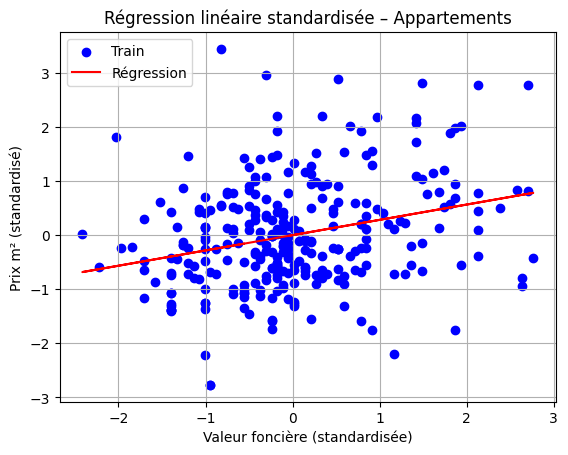

In [24]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='blue', label='Train')
plt.plot(X_train_scaled[:, 0], y_train_pred_scaled, color='red', label='Régression')
plt.title("Régression linéaire standardisée – Appartements")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
y_pred_scaled = model.predict(X_test_scaled)
mse_linear_app = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Appartements :", mse_linear_app)
print("RMSE Appartements :", np.sqrt(mse_linear_app))
print("R² Appartements :", r2_score(y_test_scaled, y_pred_scaled))

MSE Appartements : 1.2249512285110014
RMSE Appartements : 1.1067751481267554
R² Appartements : 0.03232972721650773


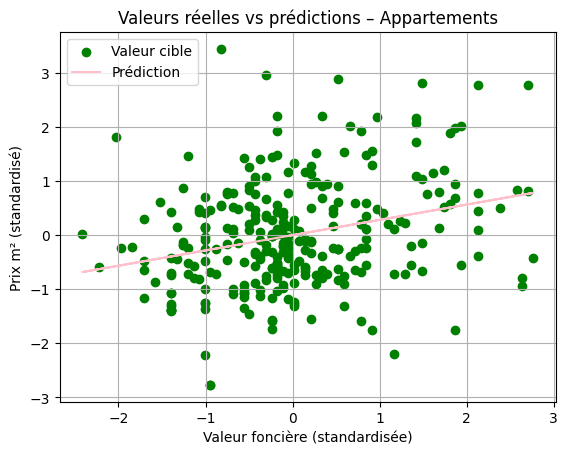

In [26]:
plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='green', label='Valeur cible')
plt.plot(X_train_scaled[:, 0], y_train_pred_scaled, color='pink', label='Prédiction')
plt.title("Valeurs réelles vs prédictions – Appartements")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
import os

racine = "sauvegardes"
modeles = ["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor", "XGBRegressor"]
types_bien = ["appartements", "maisons"]

for modele in modeles:
    for type_bien in types_bien:
        os.makedirs(os.path.join(racine, modele, type_bien), exist_ok=True)

In [28]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/LinearRegression/appartements/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/LinearRegression/appartements/app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/LinearRegression/appartements/app_scaler_y.pkl")

['sauvegardes/LinearRegression/appartements/app_scaler_y.pkl']

In [29]:
X = df_maisons[['Surface reelle bati', 'Nombre pieces principales']].values
y = df_maisons[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled)

model = grid.best_estimator_
print("Meilleur paramètre alpha :", grid.best_params_)

Meilleur paramètre alpha : {'alpha': 0.01}


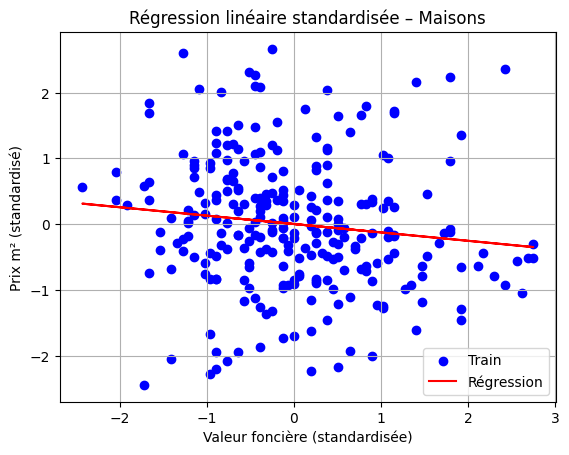

In [32]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='blue', label='Train')
plt.plot(X_train_scaled[:, 0], y_train_pred_scaled, color='red', label='Régression')
plt.title("Régression linéaire standardisée – Maisons")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_linear_mais = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Maisons :", mse_linear_mais)
print("RMSE Maisons :", np.sqrt(mse_linear_mais))
print("R² Maisons :", r2_score(y_test_scaled, y_pred_scaled))

MSE Maisons : 0.8985356592207477
RMSE Maisons : 0.9479112085109807
R² Maisons : -0.09237191853160609


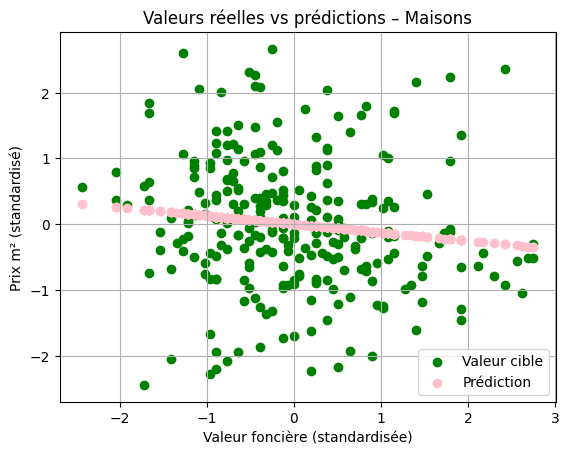

In [34]:
plt.scatter(X_train_scaled[:, 0], y_train_scaled,  color='green', label='Valeur cible')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='pink', label='Prédiction')
plt.title("Valeurs réelles vs prédictions – Maisons")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/LinearRegression/maisons/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/LinearRegression/maisons/app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/LinearRegression/maisons/app_scaler_y.pkl")

['sauvegardes/LinearRegression/maisons/app_scaler_y.pkl']

modèle DecisionTreeRegressor

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
X = df_appartements[['Surface reelle bati', 'Nombre pieces principales']].values
y = df_appartements[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled)

model = grid.best_estimator_
print("Meilleurs paramètres (Appartements) :", grid.best_params_)

Meilleurs paramètres (Appartements) : {'max_depth': 2, 'min_samples_split': 2}


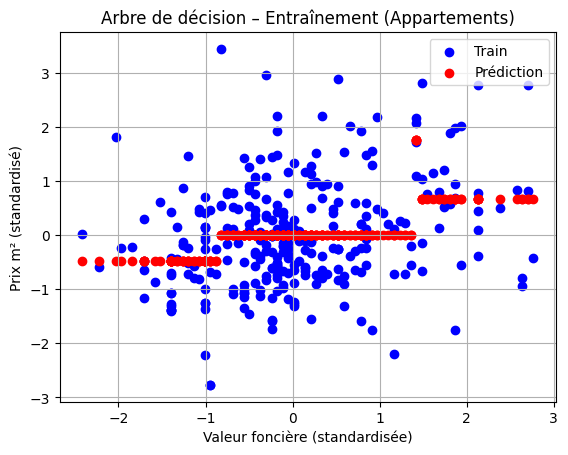

In [40]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled[:, 0], y_train_scaled,  color='blue', label='Train')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='red', label='Prédiction')
plt.title("Arbre de décision – Entraînement (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_tree_app = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Appartements :", mse_tree_app)
print("RMSE Appartements :", np.sqrt(mse_tree_app))
print("R² Appartements :", r2_score(y_test_scaled, y_pred_scaled))

MSE Appartements : 1.2816819884464796
RMSE Appartements : 1.132113946759106
R² Appartements : -0.012485665155243408


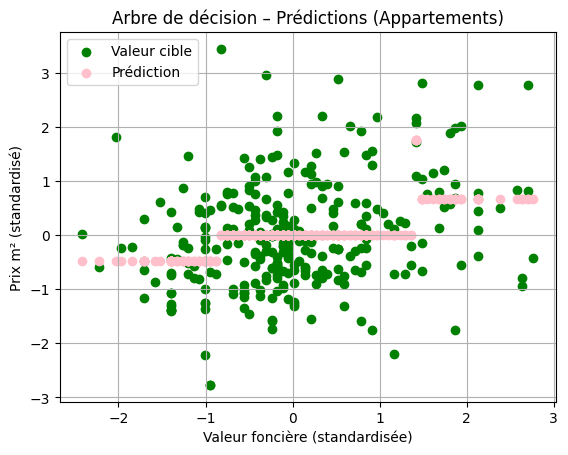

In [42]:
plt.scatter(X_train_scaled[:, 0], y_train_scaled,  color='green', label='Valeur cible')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled,  color='pink', label='Prédiction')
plt.title("Arbre de décision – Prédictions (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/DecisionTreeRegressor/appartements/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/DecisionTreeRegressor/appartements/app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/DecisionTreeRegressor/appartements/app_scaler_y.pkl")

['sauvegardes/DecisionTreeRegressor/appartements/app_scaler_y.pkl']

In [44]:
X = df_maisons[['Surface reelle bati', 'Nombre pieces principales']].values
y = df_maisons[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled)

model = grid.best_estimator_
print("Meilleurs paramètres (Maisons) :", grid.best_params_)

Meilleurs paramètres (Maisons) : {'max_depth': 2, 'min_samples_split': 2}


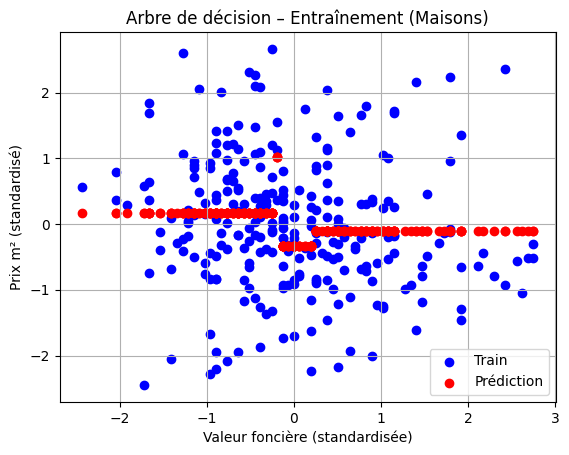

In [47]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='blue', label='Train')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='red', label='Prédiction')
plt.title("Arbre de décision – Entraînement (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_tree_mais = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Maisons :", mse_tree_mais)
print("RMSE Maisons :", np.sqrt(mse_tree_mais))
print("R² Maisons :", r2_score(y_test_scaled, y_pred_scaled))

MSE Maisons : 0.9165203244196202
RMSE Maisons : 0.9573506799598672
R² Maisons : -0.11423631870964557


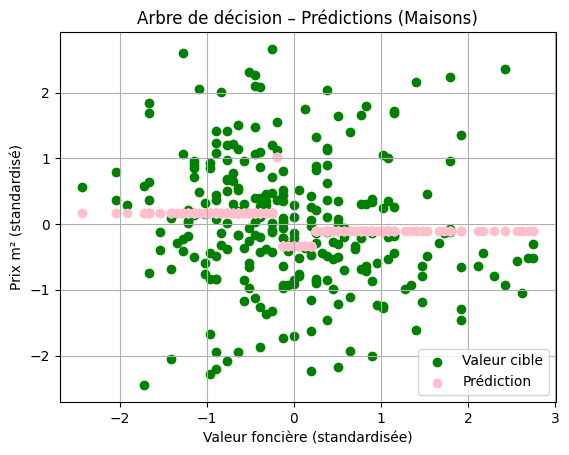

In [49]:
plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='green', label='Valeur cible')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled,color='pink', label='Prédiction')
plt.title("Arbre de décision – Prédictions (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/DecisionTreeRegressor/maisons/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/DecisionTreeRegressor/maisons/app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/DecisionTreeRegressor/maisons/app_scaler_y.pkl")

['sauvegardes/DecisionTreeRegressor/maisons/app_scaler_y.pkl']

modèle RandomForestRegressor

In [51]:
X = df_appartements[['Surface reelle bati', 'Nombre pieces principales']].values
y = df_appartements[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled.ravel())

model = grid.best_estimator_
print("Meilleurs paramètres (Appartements) :", grid.best_params_)

Meilleurs paramètres (Appartements) : {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}


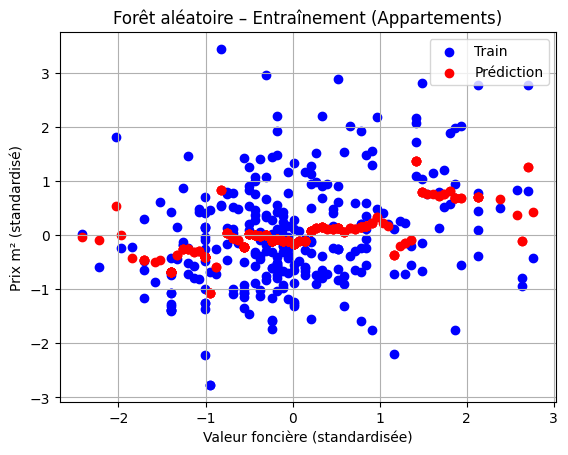

In [54]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled[:, 0], y_train_scaled,  color='blue', label='Train')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='red', label='Prédiction')
plt.title("Forêt aléatoire – Entraînement (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_forest_app = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Appartements :", mse_forest_app)
print("RMSE Appartements :", np.sqrt(mse_forest_app))
print("R² Appartements :", r2_score(y_test_scaled, y_pred_scaled))

MSE Appartements : 1.175470855757352
RMSE Appartements : 1.0841913372451157
R² Appartements : 0.07141755756070389


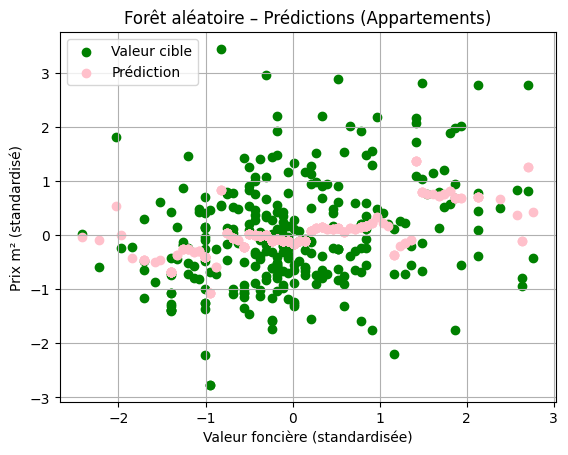

In [56]:
plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='green', label='Valeur cible')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='pink', label='Prédiction')
plt.title("Forêt aléatoire – Prédictions (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/RandomForestRegressor/appartements/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/RandomForestRegressor/appartements//app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/RandomForestRegressor/appartements//app_scaler_y.pkl")

['sauvegardes/RandomForestRegressor/appartements//app_scaler_y.pkl']

modele RandomForestRegressor

In [58]:
X = df_appartements[['Surface reelle bati', 'Nombre pieces principales']].values
y = df_maisons[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [363, 331]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled.ravel())

model = grid.best_estimator_
print("Meilleurs paramètres (Maisons) :", grid.best_params_)

In [ ]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled[:, 0], y_train_scaled,  color='blue', label='Train')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled,  color='red', label='Prédiction')
plt.title("Forêt aléatoire – Entraînement (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_forest_mais = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Maisons :", mse_forest_mais)
print("RMSE Maisons :", np.sqrt(mse_forest_mais))
print("R² Maisons :", r2_score(y_test_scaled, y_pred_scaled))

In [ ]:
plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='green', label='Valeur cible')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='pink', label='Prédiction')
plt.title("Forêt aléatoire – Prédictions (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/RandomForestRegressor/maisons/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/RandomForestRegressor/maisons//app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/RandomForestRegressor/maisons//app_scaler_y.pkl")

modèle XGBoost

In [ ]:
X = df_appartements[['Surface reelle bati', 'Nombre pieces principales']].values
y = df_appartements[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid = GridSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid,
    cv=5
)
grid.fit(X_train_scaled, y_train_scaled.ravel())

model = grid.best_estimator_
print("Meilleurs paramètres (Appartements) :", grid.best_params_)

In [ ]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='blue', label='Train')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='red', label='Prédiction')
plt.title("XGBoost – Entraînement (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_xgb_app = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Appartements :", mse_xgb_app)
print("RMSE Appartements :", np.sqrt(mse_xgb_app))
print("R² Appartements :", r2_score(y_test_scaled, y_pred_scaled))

In [ ]:
plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='green', label='Valeur cible')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='pink', label='Prédiction')
plt.title("XGBoost – Prédictions (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/XGBRegressor/appartements/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/XGBRegressor/appartements//app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/XGBRegressor/appartements//app_scaler_y.pkl")

In [ ]:
X = df_appartements[['Surface reelle bati', 'Nombre pieces principales']].values
y = df_maisons[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid = GridSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid,
    cv=5
)
grid.fit(X_train_scaled, y_train_scaled.ravel())

model = grid.best_estimator_
print("Meilleurs paramètres (Maisons) :", grid.best_params_)

In [ ]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='blue', label='Train')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='red', label='Prédiction')
plt.title("XGBoost – Entraînement (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_xgb_mais = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Maisons :", mse_xgb_mais)
print("RMSE Maisons :", np.sqrt(mse_xgb_mais))
print("R² Maisons :", r2_score(y_test_scaled, y_pred_scaled))

In [ ]:
plt.scatter(X_train_scaled[:, 0], y_train_scaled, color='green', label='Valeur cible')
plt.scatter(X_train_scaled[:, 0], y_train_pred_scaled, color='pink', label='Prédiction')
plt.title("XGBoost – Prédictions (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/XGBRegressor/maisons/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/XGBRegressor/maisons//app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/XGBRegressor/maisons//app_scaler_y.pkl")

In [ ]:
import pandas as pd

# Tableau comparatif avec MSE pour Appartements & Maisons
comparatif = pd.DataFrame({
    "Modèle": [
        "Régression linéaire : LinearRegression",
        "Arbre de décision : DecisionTreeRegressor",
        "Forêt aléatoire : RandomForestRegressor",
        "XGBoost : XGBRegressor"
    ],
    "MSE Appartements": [
        mse_linear_app,
        mse_tree_app,
        mse_forest_app,
        mse_xgb_app
    ],
    "MSE Maisons": [
        mse_linear_mais,
        mse_tree_mais,
        mse_forest_mais,
        mse_xgb_mais
    ]
})

# Mise en forme
comparatif.set_index("Modèle", inplace=True)

# Stylisation propre et lisible
styled_comparatif = comparatif.style\
    .format("{:.4f}")\
    .highlight_min(axis=0, color="#C1F0C1")\
    .highlight_max(axis=0, color="#F8C8DC")\
    .set_properties(**{'color': 'black', 'background-color': 'white'})\
    .set_caption("📊 Comparatif des MSE pour Appartements et Maisons")\
    .set_table_styles([
        {"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]},
        {"selector": "th", "props": [("color", "black"), ("background-color", "white")]},
        {"selector": "td", "props": [("color", "black"), ("background-color", "white")]}
    ])

# Affichage du tableau
display(styled_comparatif)
